In [1]:
import networkx as nx
from matplotlib import pyplot as plt
from pyvis.network import Network
from simpy import Environment
from models.node import ConsumerNode, ProducerNode
from models.net import Net


nodes = [
    ProducerNode(0, max_production=500),
    ConsumerNode(1, min_consumption=10, max_consumption=20),
    ConsumerNode(2),
    ConsumerNode(3),
    ConsumerNode(4),
    ConsumerNode(5),
    ConsumerNode(6),
    ProducerNode(7),
]



In [2]:
import numpy as np

costs = np.array([
    [np.inf, 1, 1, 1, 1, 1, 1, 1],
    [1, np.inf, 1, 1, 1, 1, 1, 1],
    [1, 1, np.inf, 1, 1, 1, 1, 1],
    [1, 1, 1, np.inf, 1, 1, 1, 1],
    [1, 1, 1, 1, np.inf, 1, 1, 1],
    [1, 1, 1, 1, 1, np.inf, 1, 1],
    [1, 1, 1, 1, 1, 1, np.inf, 1],
    [1, 1, 1, 1, 1, 1, 1, np.inf],
])



def fitness(graph: nx.Graph) -> float:
    g = build_from_nodes(nodes, graph)    
    env = Environment()
    net = Net(g, 100, env, with_visual=False)
    env.process(net.run())

    env.run(until=10)
    return net.score

from metaheuristics.genetic_algorithm import GeneticAlgorithm

ga = GeneticAlgorithm(10, 50, costs, fitness)

sol = ga.run()

print(sol[0].edges())


env = Environment()
net = Net(build_from_nodes(nodes, sol[0]), 100, env, with_visual=True)
env.process(net.run())


Produced 50.0 by node 0
Produced 25.0 by node 7
Simulation time:  0
Resources:  825.0
Score:  0.0
Produced 100.0 by node 0
Produced 96.21715139000374 by node 7
Simulation time:  1
Resources:  1425.0
Score:  0.0
Produced 100.0 by node 0
Produced 98.40803311238733 by node 7
Simulation time:  2
Resources:  2028.782848609996
Score:  0.0
Produced 100.0 by node 0
Produced 93.95351776723957 by node 7
Simulation time:  3
Resources:  2630.374815497609
Score:  0.0
Produced 100.0 by node 0
Produced 91.8850196839672 by node 7
Simulation time:  4
Resources:  3236.4212977303687
Score:  0.0
Produced 100.0 by node 0
Produced 98.09248928454727 by node 7
Simulation time:  5
Resources:  3844.536278046402
Score:  0.0
Produced 100.0 by node 0
Produced 96.89444534043362 by node 7
Simulation time:  6
Resources:  4446.443788761855
Score:  0.0
Produced 100.0 by node 0
Produced 95.14625899219176 by node 7
Simulation time:  7
Resources:  5049.549343421421
Score:  0.0
Produced 100.0 by node 0
Produced 99.45708324

<Process(run) object at 0x7f5a87fafb50>

Produced 50.0 by node 0
Fed node 1. Remaining power: 31.136232011435364
Fed node 2. Remaining power: 0.0
Produced 33.109018261179656 by node 7
Fed node 2. Remaining power: 25.41807261873063
Fed node 3. Remaining power: 0.0
Simulation time:  0


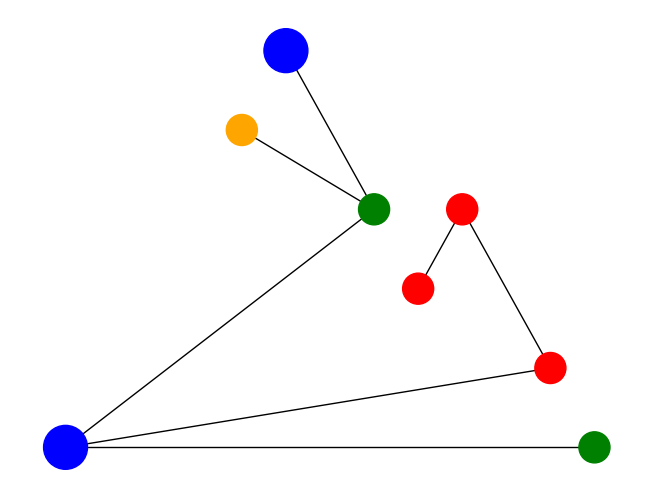

Resources:  825.0
Score:  0.4166666666666667
Produced 100.0 by node 0
Fed node 1. Remaining power: 87.80608647942526
Fed node 2. Remaining power: 48.11934097154466
Fed node 5. Remaining power: 16.8221014216233
Fed node 3. Remaining power: 0.0
Produced 93.55065665000676 by node 7
Fed node 2. Remaining power: 93.55065665000676
Fed node 3. Remaining power: 62.244112490201125
Fed node 1. Remaining power: 62.244112490201125
Fed node 5. Remaining power: 62.244112490201125
Fed node 4. Remaining power: 26.885715412183615
Fed node 6. Remaining power: 0.0
Simulation time:  1


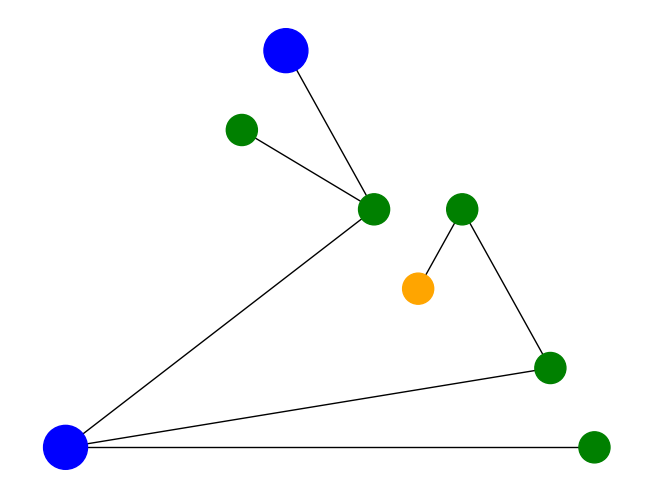

Resources:  1425.0
Score:  0.6666666666666666
Produced 100.0 by node 0
Fed node 1. Remaining power: 88.00849517492736
Fed node 2. Remaining power: 38.35495910075422
Fed node 5. Remaining power: 0.6114019676120606
Fed node 3. Remaining power: 0.0
Produced 93.80084065974292 by node 7
Fed node 2. Remaining power: 93.80084065974292
Fed node 3. Remaining power: 56.80538929854557
Fed node 1. Remaining power: 56.80538929854557
Fed node 5. Remaining power: 56.80538929854557
Fed node 4. Remaining power: 11.634842583444986
Fed node 6. Remaining power: 0.0
Simulation time:  2


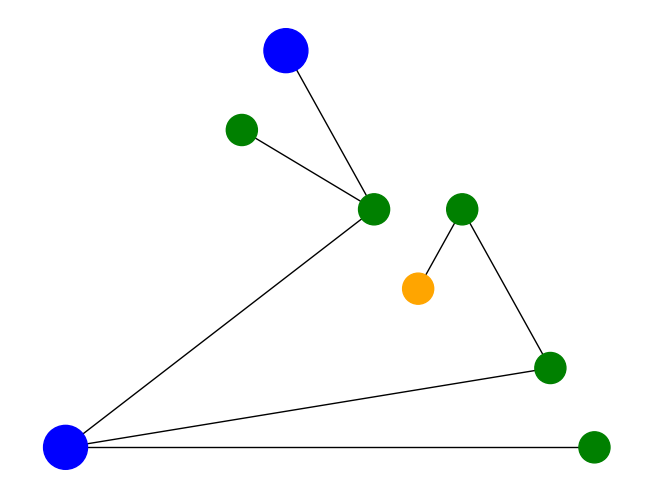

Resources:  2031.4493433499933
Score:  0.75
Produced 100.0 by node 0
Fed node 1. Remaining power: 84.72610961403157
Fed node 2. Remaining power: 50.296981935388075
Fed node 5. Remaining power: 14.492312646594435
Fed node 3. Remaining power: 0.0
Produced 92.265614638161 by node 7
Fed node 2. Remaining power: 92.265614638161
Fed node 3. Remaining power: 57.014110542031425
Fed node 1. Remaining power: 57.014110542031425
Fed node 5. Remaining power: 57.014110542031425
Fed node 4. Remaining power: 15.648738488941873
Fed node 6. Remaining power: 0.0
Simulation time:  3


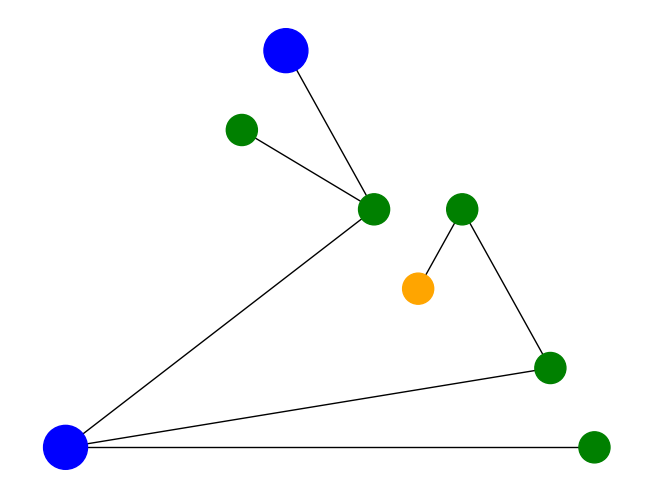

Resources:  2637.6485026902506
Score:  0.7916666666666666
Produced 100.0 by node 0
Fed node 1. Remaining power: 85.40100162711877
Fed node 2. Remaining power: 48.077259125174905
Fed node 5. Remaining power: 10.751948475460381
Fed node 3. Remaining power: 0.0
Produced 90.14299528150059 by node 7
Fed node 2. Remaining power: 90.14299528150059
Fed node 3. Remaining power: 53.61943431291513
Fed node 1. Remaining power: 53.61943431291513
Fed node 5. Remaining power: 53.61943431291513
Fed node 4. Remaining power: 11.843540654823869
Fed node 6. Remaining power: 0.0
Simulation time:  4


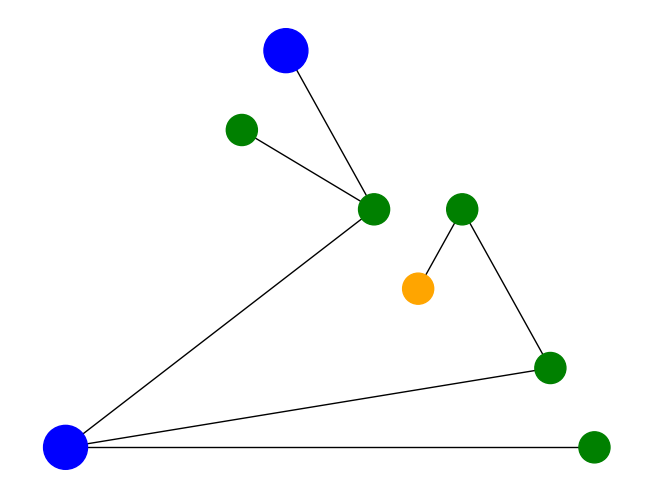

In [3]:
env.run(until=5)